In [2]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Utilities
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load dataset
df = pd.read_csv("stream_subscription.csv")

# Display first 5 rows
df

,customer_id,age,location,subscription_type,payment_plan,num_subscription_pauses,payment_method,customer_service_inquiries,signup_date,weekly_hours,average_session_length,song_skip_rate,weekly_songs_played,weekly_unique_songs,num_favorite_artists,num_platform_friends,num_playlists_created,num_shared_playlists,notifications_clicked,churned
0,1,32.0,Montana,Free,Yearly,2,Paypal,Medium,-1606,22.391362,105.394516,0.176873,169,109,18,32,52,35,46,0
1,2,64.0,New Jersey,Free,Monthly,3,Paypal,Low,-2897,29.294210,52.501115,0.981811,55,163,44,33,12,25,37,1
2,3,51.0,Washington,Premium,Yearly,2,Credit Card,High,-348,15.400312,24.703696,0.048411,244,117,20,129,50,28,38,0
3,4,63.0,California,Family,Yearly,4,Apple Pay,Medium,-2894,22.842084,83.595480,0.035691,442,252,47,120,55,17,24,0
4,5,54.0,Washington,Family,Monthly,3,Paypal,High,-92,23.151163,52.578266,0.039738,243,230,41,66,40,32,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124995,124996,32.0,California,Student,Monthly,4,Debit Card,Low,-1895,29.161399,7.176704,0.893839,460,22,18,199,71,41,41,0
124996,124997,NaN,Maine,Premium,Yearly,2,Debit Card,Low,-2778,44.744198,105.069363,0.668759,315,16,48,185,67,23,30,0
124997,124998,45.0,Maine,Family,Monthly,0,Paypal,Medium,-604,15.200073,78.064000,0.286604,11,206,48,40,78,40,28,0
124998,124999,69.0,Maine,Free,Monthly,4,Paypal,High,-2570,35.270053,20.921062,0.092528,451,108,15,41,3,35,9,1


In [4]:
# Shape
print("Shape:", df.shape)

# Info
df.info()

# Check duplicates
df.duplicated().sum()

Shape: (125000, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   customer_id                 125000 non-null  int64  
 1   age                         112090 non-null  float64
 2   location                    123667 non-null  object 
 3   subscription_type           123667 non-null  object 
 4   payment_plan                125000 non-null  object 
 5   num_subscription_pauses     125000 non-null  int64  
 6   payment_method              125000 non-null  object 
 7   customer_service_inquiries  125000 non-null  object 
 8   signup_date                 125000 non-null  int64  
 9   weekly_hours                112089 non-null  float64
 10  average_session_length      125000 non-null  float64
 11  song_skip_rate              125000 non-null  float64
 12  weekly_songs_played         125000 non-null  int64  

np.int64(0)

In [5]:
# Check missing values
df.isnull().sum()


customer_id                       0
age                           12910
location                       1333
subscription_type              1333
payment_plan                      0
num_subscription_pauses           0
payment_method                    0
customer_service_inquiries        0
signup_date                       0
weekly_hours                  12911
average_session_length            0
song_skip_rate                    0
weekly_songs_played               0
weekly_unique_songs               0
num_favorite_artists              0
num_platform_friends              0
num_playlists_created             0
num_shared_playlists              0
notifications_clicked             0
churned                           0
dtype: int64

In [6]:
#Data_cleaning
# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop customer_id
df.drop('customer_id', axis=1, inplace=True)

# Convert churned column 0/1 → No/Yes
df['churned'] = df['churned'].map({0: "No", 1: "Yes"})

# Backfill specific columns
df['age'].fillna(method='bfill', inplace=True)
df['weekly_hours'].fillna(method='bfill', inplace=True)

# Fill remaining  missing values

for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

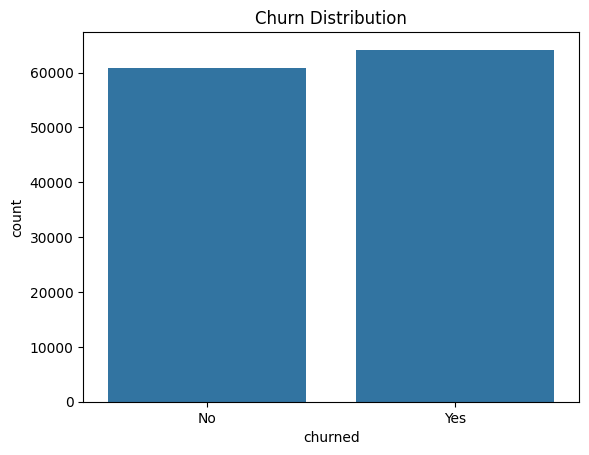

In [7]:
#Univariate analysis
#churn distribution
sns.countplot(x='churned', data=df)
plt.title("Churn Distribution")
plt.show()

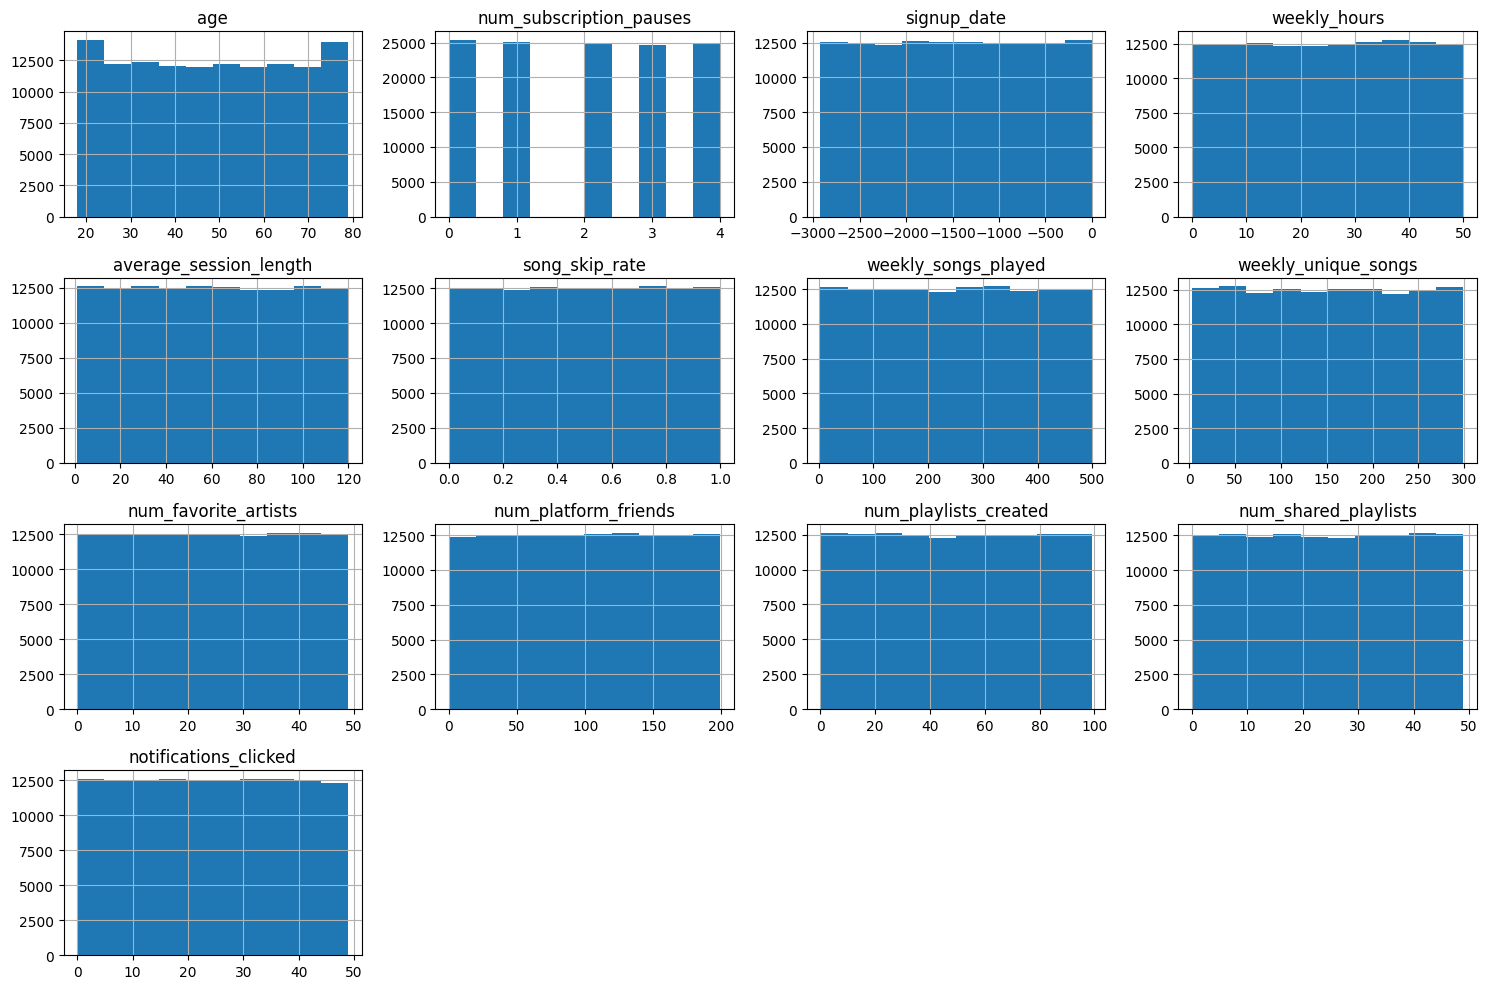

In [8]:
#histogram
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

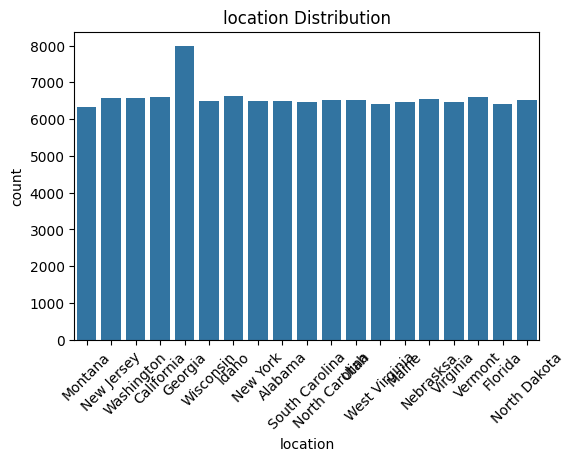

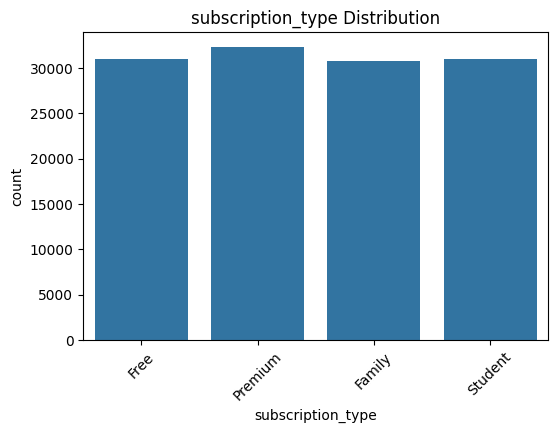

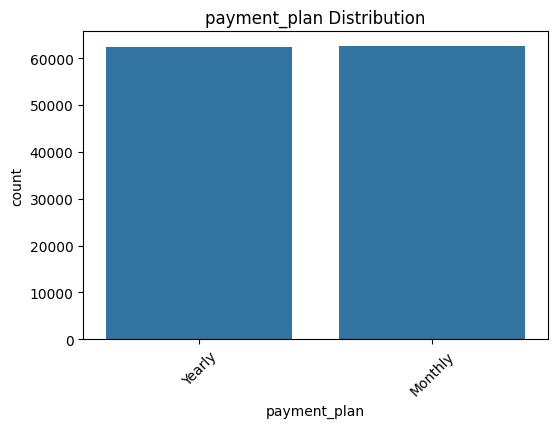

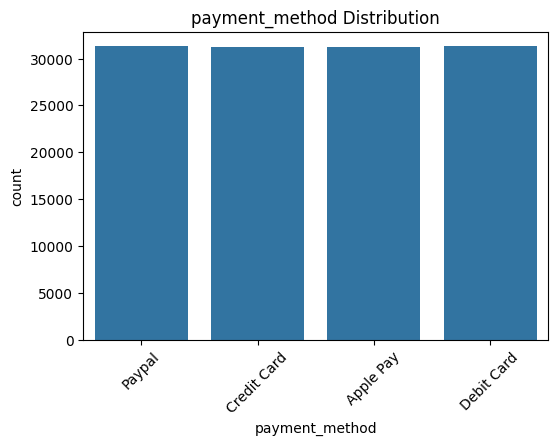

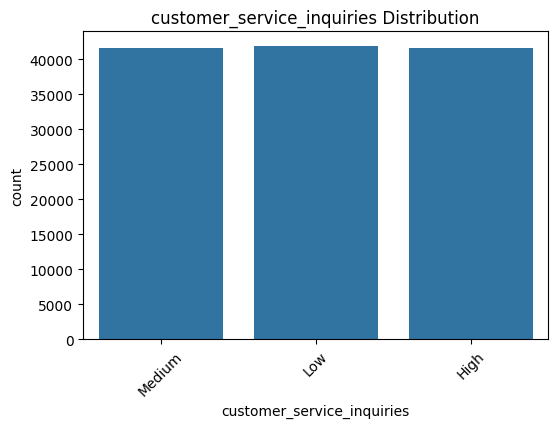

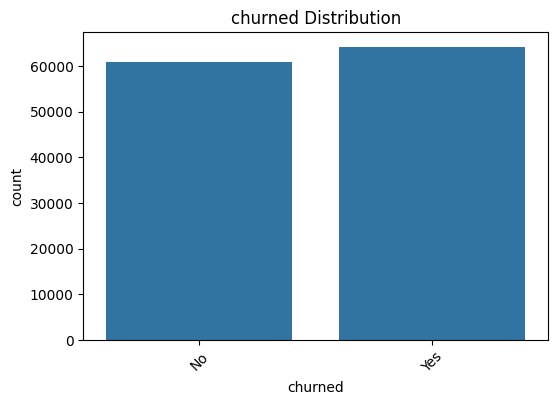

In [9]:
#categorical countplots
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f"{col} Distribution")
    plt.show()

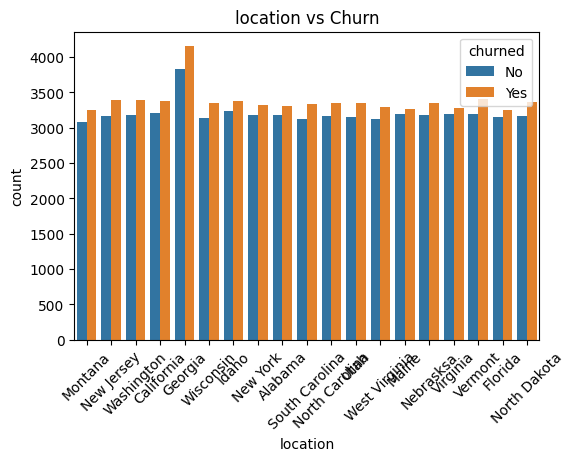

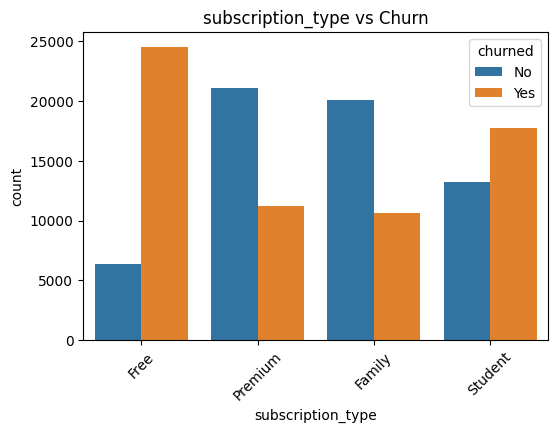

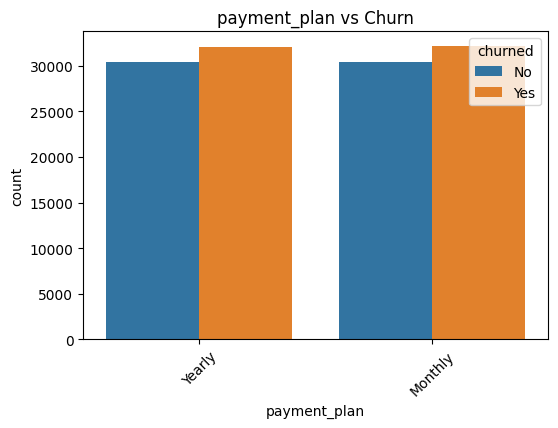

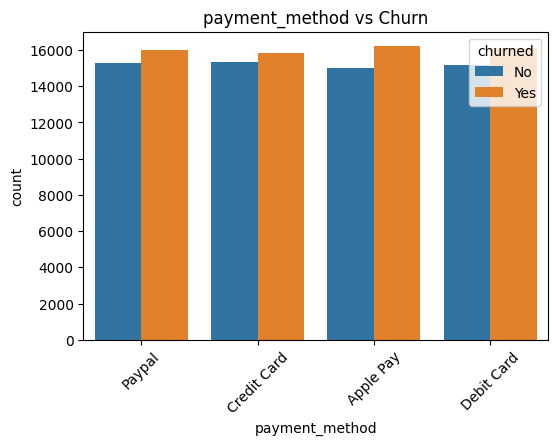

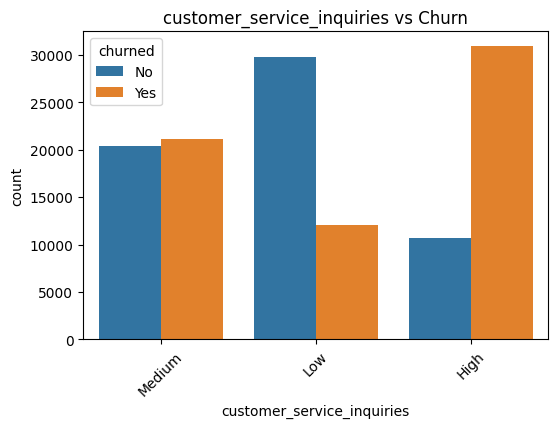

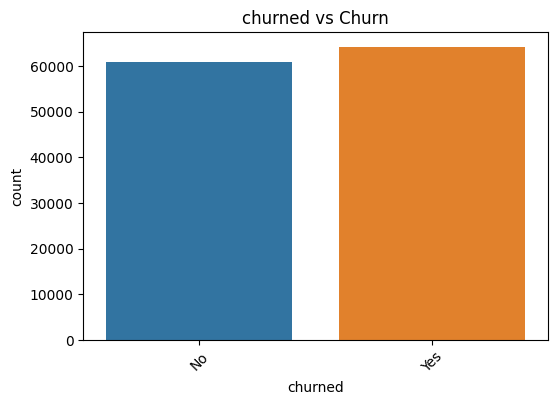

In [10]:
#Bivariate analysis
#categorical vs churn
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='churned', data=df)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Churn")
    plt.show()

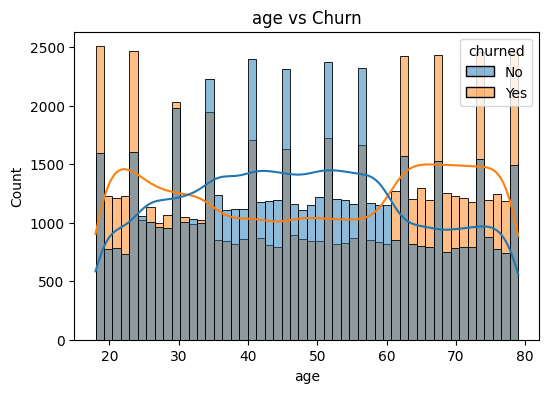

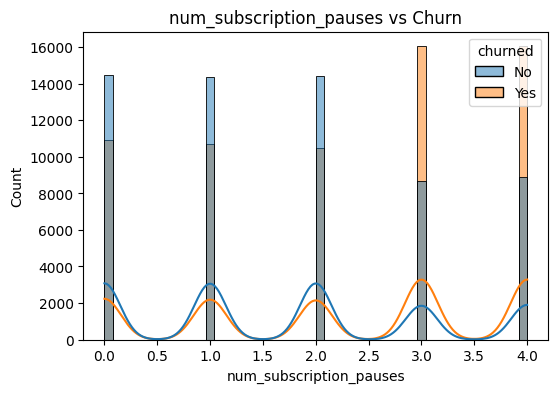

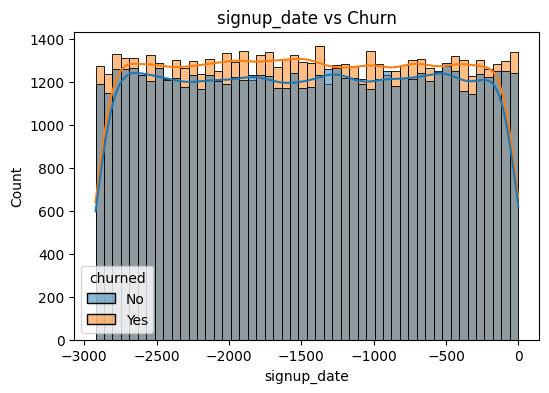

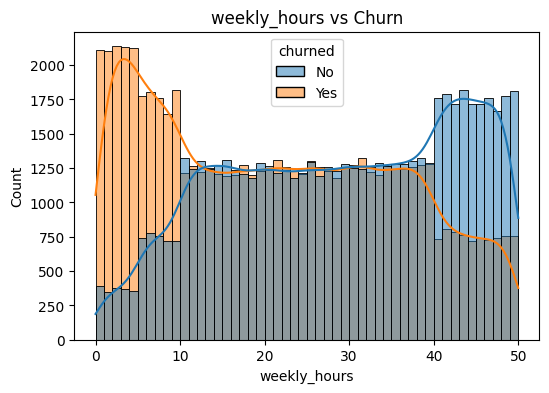

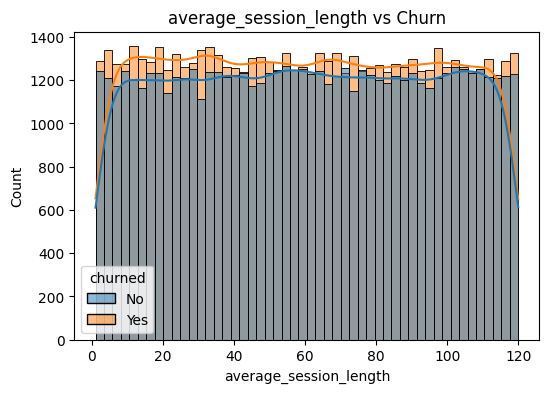

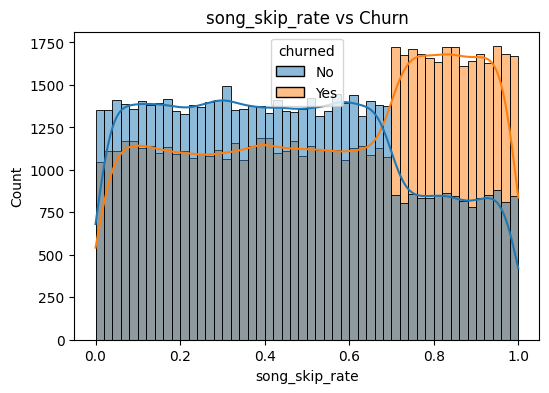

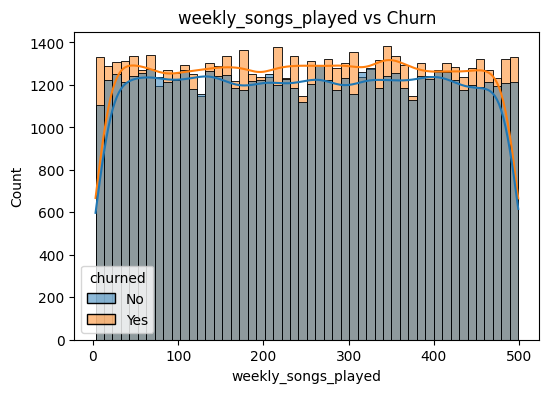

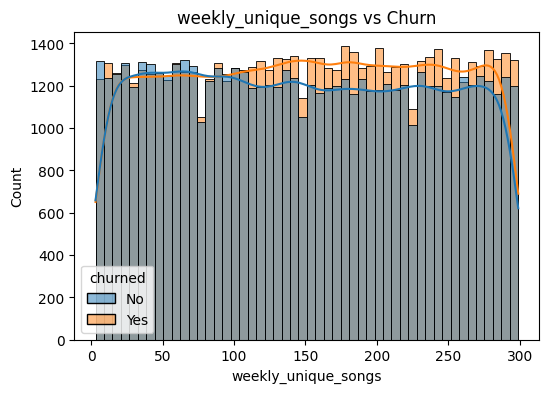

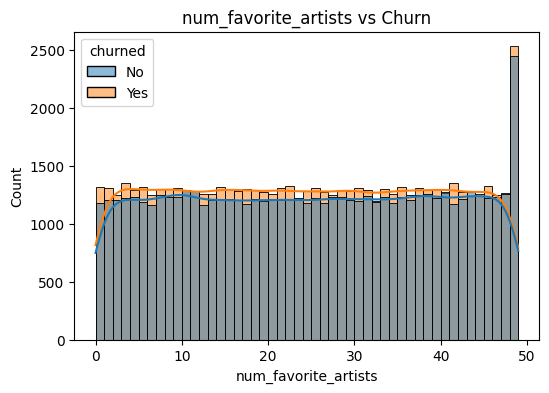

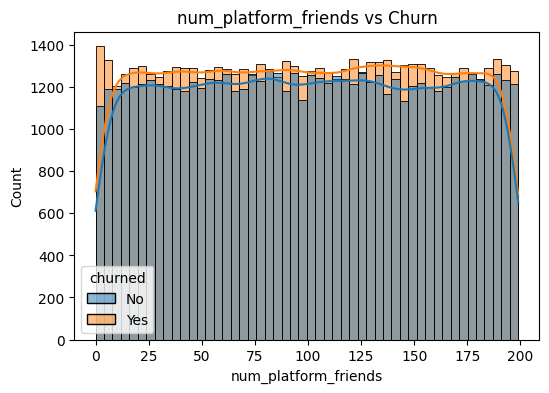

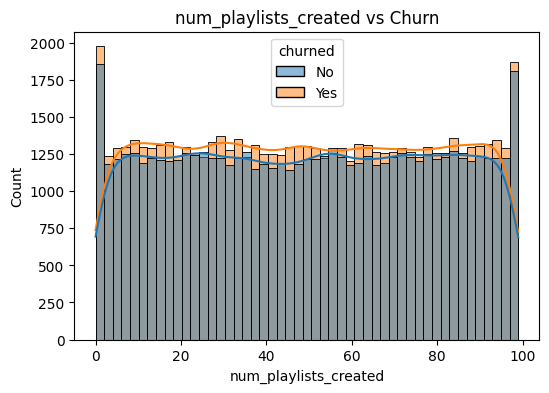

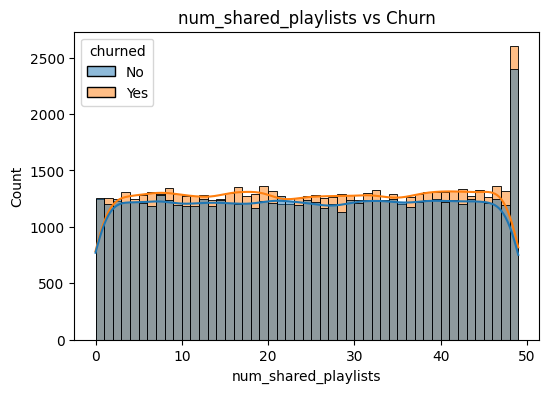

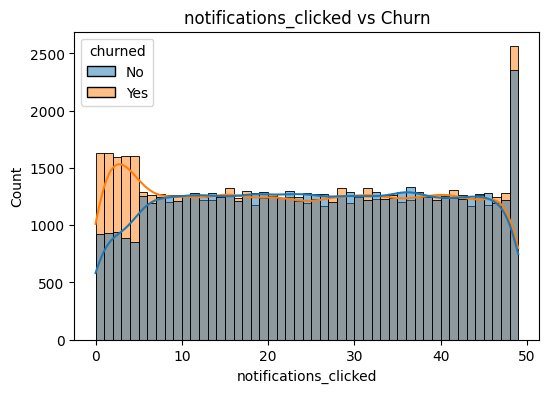

In [11]:
#numerical vs churn
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue='churned', kde=True)
    plt.title(f"{col} vs Churn")
    plt.show()


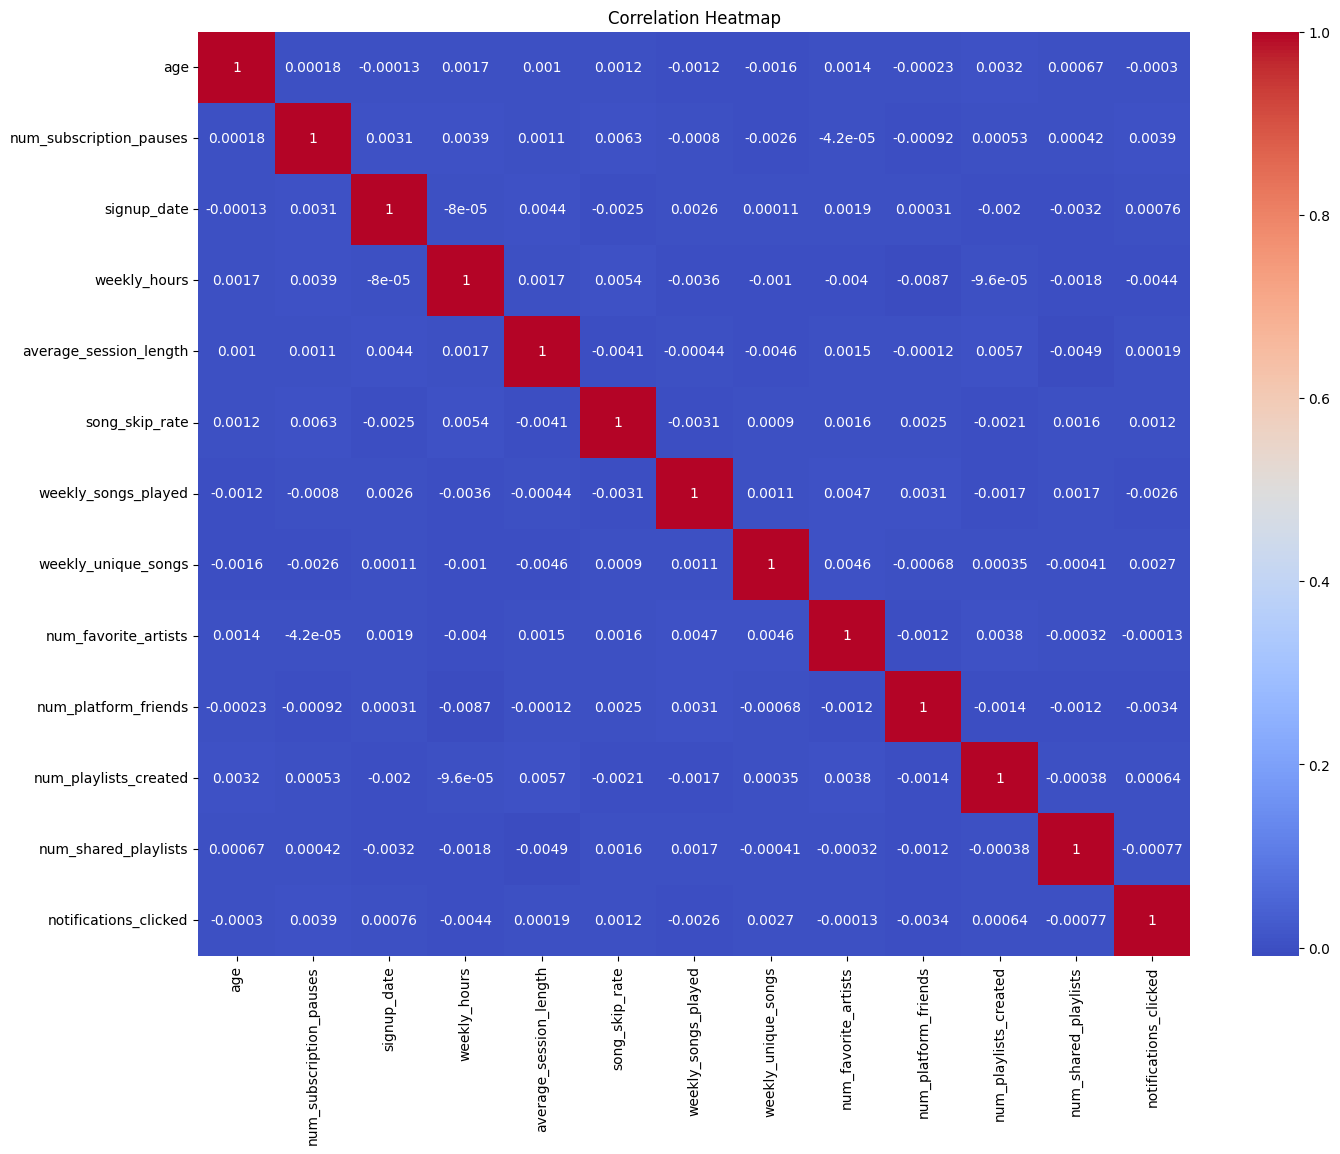

In [12]:
#correlation heatmapplt.figure(figsize=(10,6))
plt.figure(figsize=(16,12))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [13]:
#feature selection
df.drop(['location', 'signup_date', 'payment_plan',
         'payment_method'], axis=1, inplace=True)

In [14]:
#encoding
label_encoders = {}

for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [15]:
X = df.drop("churned", axis=1)
y = df["churned"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
#baseline models (training)
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.6730
Random Forest Accuracy: 0.8268
Decision Tree Accuracy: 0.7702
Naive Bayes Accuracy: 0.7176


In [19]:
#advanced models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

advanced_models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier()
}

for name, model in advanced_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

Gradient Boosting Accuracy: 0.8333
AdaBoost Accuracy: 0.8318
XGBoost Accuracy: 0.8291
[LightGBM] [Info] Number of positive: 51337, number of negative: 48663
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1799
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513370 -> initscore=0.053493
[LightGBM] [Info] Start training from score 0.053493


  File "c:\Users\soura\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "c:\Users\soura\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\soura\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\soura\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
            

LightGBM Accuracy: 0.8328


In [20]:
results_df = pd.DataFrame(results.items(), columns=["Model", "Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)

results_df

,Model,Accuracy
4,Gradient Boosting,0.83328
7,LightGBM,0.83284
5,AdaBoost,0.83176
6,XGBoost,0.82908
1,Random Forest,0.82684
2,Decision Tree,0.77024
3,Naive Bayes,0.71756
0,Logistic Regression,0.67296


Gradient Boosting achieved the highest accuracy and was selected as the final model.

In [37]:
#Tuning
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],   
    'learning_rate': [0.01, 0.05, 0.1],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'subsample': [0.7, 0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

In [39]:
gb = GradientBoostingClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1   
)

print("Tuning Gradient Boosting...")
random_search.fit(X_train, y_train)


Tuning Gradient Boosting...


,estimator,GradientBoost...ndom_state=42)
,param_distributions,"{'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 5, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [40]:
print("Best Parameters:")
print(random_search.best_params_)

Best Parameters:
{'subsample': 0.7, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 7, 'learning_rate': 0.05}


In [41]:
print("Best CV Accuracy:", random_search.best_score_)


Best CV Accuracy: 0.8334599767669243


In [42]:
best_gb = random_search.best_estimator_

y_pred_tuned = best_gb.predict(X_test)

print("Tuned Test Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))

Tuned Test Accuracy: 0.82892

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82     12163
           1       0.83      0.84      0.83     12837

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



Base Test Accuracy = 0.83328

Tuned Test Accuracy = 0.82892

Drop = 0.28%

Hyperparameter tuning optimizes cross-validation accuracy, not the test set. In my case, the test accuracy reduced only by 0.28%, which is a very small variation and considered normal. The model still generalizes well since CV accuracy (83.3%) and test accuracy (82.8%) are very close.

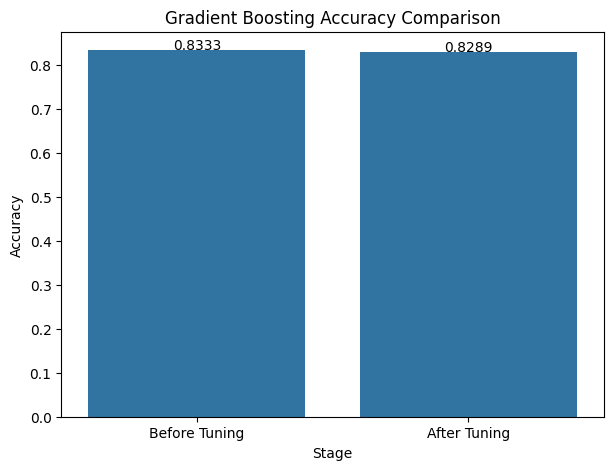

In [43]:
base_accuracy = results_df[results_df["Model"]=="Gradient Boosting"]["Accuracy"].values[0]
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)

comparison = pd.DataFrame({
    "Stage": ["Before Tuning", "After Tuning"],
    "Accuracy": [base_accuracy, tuned_accuracy]
})

plt.figure(figsize=(7,5))
sns.barplot(x="Stage", y="Accuracy", data=comparison)

for i, acc in enumerate(comparison["Accuracy"]):
    plt.text(i, acc + 0.002, f"{acc:.4f}", ha='center')

plt.title("Gradient Boosting Accuracy Comparison")
plt.show()

In [44]:
y_prob = best_gb.predict_proba(X_test)[:,1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

ROC-AUC Score: 0.9255992280238556


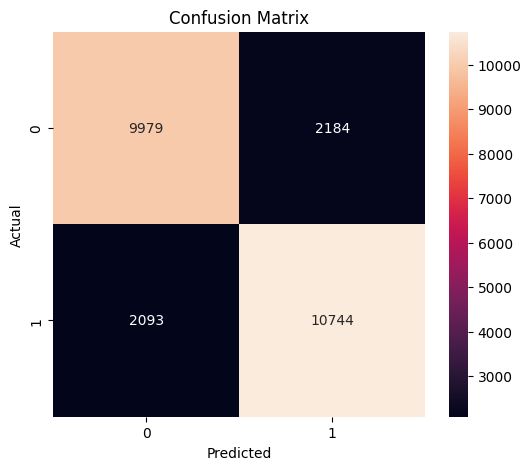

In [45]:
cm = confusion_matrix(y_test, y_pred_tuned)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [46]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": best_gb.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance.head(10)

,Feature,Importance
1,subscription_type,0.265051
3,customer_service_inquiries,0.225162
4,weekly_hours,0.187583
6,song_skip_rate,0.089366
2,num_subscription_pauses,0.081985
0,age,0.066525
13,notifications_clicked,0.020186
8,weekly_unique_songs,0.015963
5,average_session_length,0.011960
10,num_platform_friends,0.009458


Although test accuracy is around 83%, the ROC-AUC score of 0.92 shows that the model has excellent discriminative ability and can effectively separate the two classes.

The most influential factors affecting churn are user age, song skip rate, and weekly engagement metrics. Higher skip rate and lower engagement may indicate dissatisfaction, increasing churn probability.


In [48]:
#Saving final model
import joblib
joblib.dump(best_gb, "final_gradientboost_model.pkl")

['final_gradientboost_model.pkl']

In [49]:
import os
os.listdir()

['.ipynb_checkpoints',
 'customer_churn.ipynb',
 'customer_churn_(1) full.ipynb',
 'datasetlink.txt',
 'final_gradientboost_model.pkl',
 'final_lightgbm_model.pkl',
 'label_encoders.pkl',
 'model_features.pkl',
 'scaler.pkl',
 'stream_subscription.csv']

In [50]:
loaded_model = joblib.load("final_gradientboost_model.pkl")

y_pred_loaded = loaded_model.predict(X_test)

print("Loaded Model Accuracy:", accuracy_score(y_test, y_pred_loaded))

Loaded Model Accuracy: 0.82892


In [51]:
#sample usage of the saved model
import joblib

model = joblib.load("final_gradientboost_model.pkl")

In [52]:
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X.columns, "model_features.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")

['label_encoders.pkl']

In [53]:
import joblib
import pandas as pd

# Load everything
model = joblib.load("final_gradientboost_model.pkl")
scaler = joblib.load("scaler.pkl")
feature_names = joblib.load("model_features.pkl")
label_encoders = joblib.load("label_encoders.pkl")

# New user input
new_user_dict = {
    'age': 29,
    'subscription_type': 'Premium',
    'num_subscription_pauses': 0,
    'customer_service_inquiries': 'Low',
    'weekly_hours': 32.5,
    'average_session_length': 58.4,
    'song_skip_rate': 0.22,
    'weekly_songs_played': 310,
    'weekly_unique_songs': 180,
    'num_favorite_artists': 25,
    'num_platform_friends': 120,
    'num_playlists_created': 55,
    'num_shared_playlists': 30,
    'notifications_clicked': 18
}

new_user = pd.DataFrame([new_user_dict])

# Encode only required columns
for col in label_encoders:
    if col in new_user.columns:
        new_user[col] = label_encoders[col].transform(new_user[col])

# Ensure correct column order
new_user = new_user.reindex(columns=feature_names)

# Scale
new_user_scaled = scaler.transform(new_user)

# Predict
prediction = model.predict(new_user_scaled)
probability = model.predict_proba(new_user_scaled)[:,1]

print("Prediction:", prediction[0])
print("Churn Probability:", probability[0])

Prediction: 0
Churn Probability: 0.015626547537726788


In [54]:
df

,age,subscription_type,num_subscription_pauses,customer_service_inquiries,weekly_hours,average_session_length,song_skip_rate,weekly_songs_played,weekly_unique_songs,num_favorite_artists,num_platform_friends,num_playlists_created,num_shared_playlists,notifications_clicked,churned
0,32.0,1,2,2,22.391362,105.394516,0.176873,169,109,18,32,52,35,46,0
1,64.0,1,3,1,29.294210,52.501115,0.981811,55,163,44,33,12,25,37,1
2,51.0,2,2,0,15.400312,24.703696,0.048411,244,117,20,129,50,28,38,0
3,63.0,0,4,2,22.842084,83.595480,0.035691,442,252,47,120,55,17,24,0
4,54.0,0,3,0,23.151163,52.578266,0.039738,243,230,41,66,40,32,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124995,32.0,3,4,1,29.161399,7.176704,0.893839,460,22,18,199,71,41,41,0
124996,45.0,2,2,1,44.744198,105.069363,0.668759,315,16,48,185,67,23,30,0
124997,45.0,0,0,2,15.200073,78.064000,0.286604,11,206,48,40,78,40,28,0
124998,69.0,1,4,0,35.270053,20.921062,0.092528,451,108,15,41,3,35,9,1
